# HEALTH INSURANCE PREMIUM PREDICTION USING MACHINE LEARNING(LINEAR REGRESSION MODEL)

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#importing the dataset
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,2455.92400
1,18,male,33.770,1,no,southeast,3650.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,3840.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,12610.54830
1334,18,female,31.920,0,no,northeast,2895.98080
1335,18,female,36.850,0,no,southeast,4100.83350
1336,21,female,25.800,0,no,southwest,1402.94500


In [3]:
#printing the first five rows of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,2455.92400
1,18,male,33.770,1,no,southeast,3650.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,3840.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#printing the last five rows of the data
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,12610.5483
1334,18,female,31.92,0,no,northeast,2895.9808
1335,18,female,36.85,0,no,southeast,4100.8335
1336,21,female,25.80,0,no,southwest,1402.9450
1337,61,female,29.07,0,yes,northwest,36900.3603


In [5]:
#the shape of the dataset
df.shape

(1338, 7)

In [6]:
#the size of the dataset
df.size

9366

In [7]:
#data types of all columns in the dataset
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
#the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13241.257093
std,14.049960,6.098187,1.205493,12133.611059
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4686.740775
50%,39.000000,30.400000,1.000000,9296.016525
75%,51.000000,34.693750,2.000000,16454.504562
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#printing the numerical columns
[features for features in df.dtypes[df.dtypes !="object"].index]

['age', 'bmi', 'children', 'charges']

In [11]:
num_features=df.dtypes[df.dtypes!="object"].index

In [12]:
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [13]:
len(num_features)

4

In [14]:
df[num_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13241.257093
std,14.049960,6.098187,1.205493,12133.611059
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4686.740775
50%,39.000000,30.400000,1.000000,9296.016525
75%,51.000000,34.693750,2.000000,16454.504562
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
cat_features=df.dtypes[df.dtypes=="object"].index

In [16]:
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [17]:
df[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# check the UNIQUE libraries in the categorical variables

In [18]:
#check the unique values in the "sex" column
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [19]:
#print the no.of lables of "sex" variables
print(df.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


In [20]:
#check the unique values in the "smoker" column
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [21]:
#print the no.of lables of "smoker" variables
print(df.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [22]:
#check the unique va;ues in the "region" column
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
#print the no.of lables of "region" variables
print(df.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


# DATA CLEANING

In [24]:
#checking the shape
#df.shape

In [25]:
#removing the duplicates
#df=df.drop_duplicates()

In [26]:
#df

In [27]:
#after removing the duplicates the shape is
df.shape

(1338, 7)

# CHECKING THE NULL VALUES

In [28]:
#checking the null values
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [29]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# DATA VISULIZATION

# HISTOGRAM

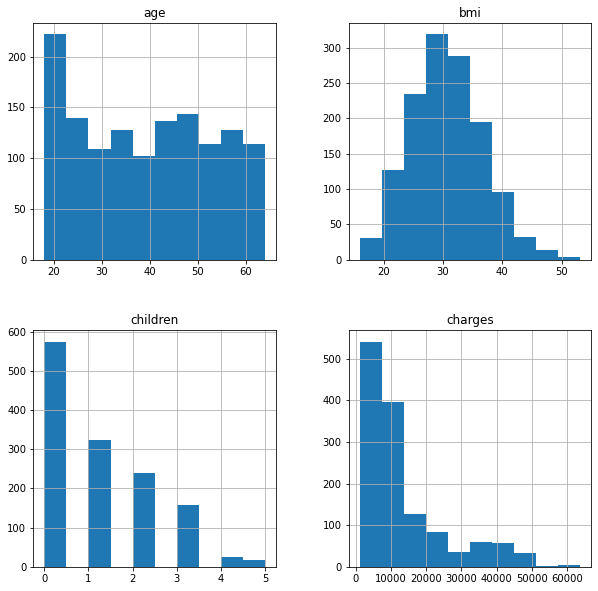

In [30]:
#histogram of each feature
df.hist(bins=10,figsize=(10,10))
plt.show()

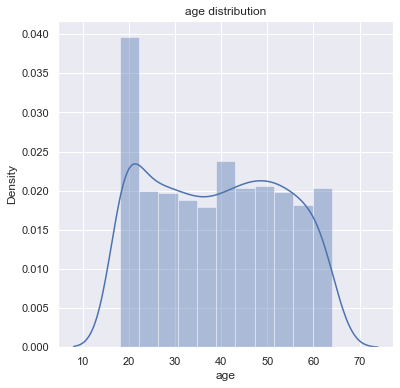

In [31]:
# distribution of age values
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df["age"])
plt.title("age distribution")
plt.show()

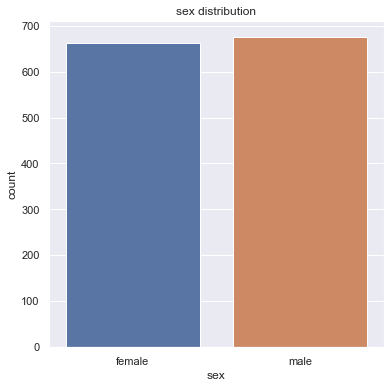

In [32]:
#distribution for gender columns
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("sex distribution")
plt.show()

In [33]:
#print the no.of lables of "sex" variables
print(df.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


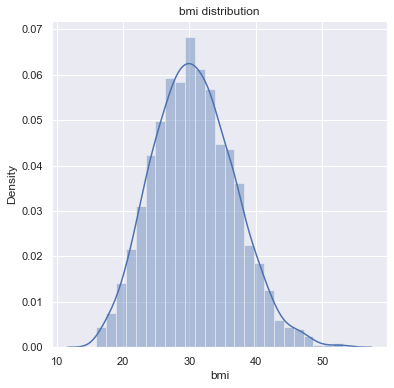

In [34]:
#bmi distribution (body mass index)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(6,6))
sns.distplot(df["bmi"])
plt.title("bmi distribution")
plt.show()

normal bmi range-->18.5 to 24.9

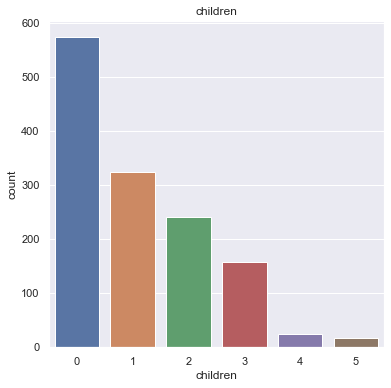

In [35]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x="children",data=df)
plt.title("children")
plt.show()

In [36]:
print(df["children"].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


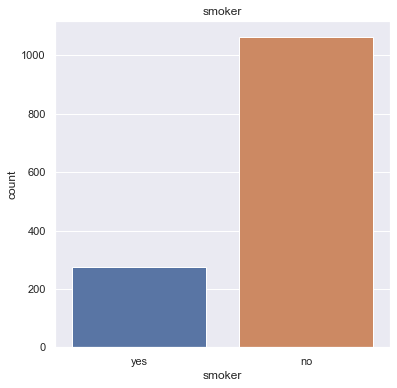

In [37]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=df)
plt.title("smoker")
plt.show()

In [38]:
print(df["smoker"].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


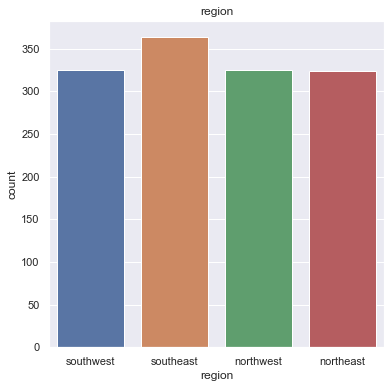

In [39]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=df)
plt.title("region")
plt.show()

In [40]:
print(df["region"].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


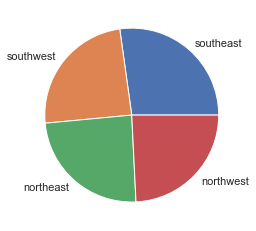

In [41]:
#pie chart for the region column
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
x=df["region"].value_counts()
names=["southeast","southwest","northeast","northwest"]
fig=plt.pie(x,labels=names)

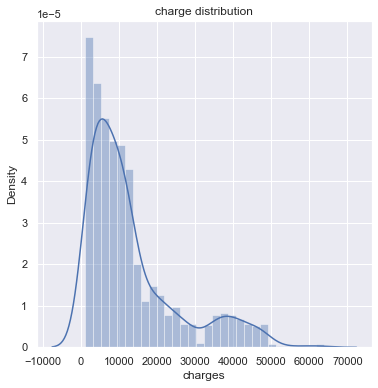

In [42]:
#distibution of charges values
plt.figure(figsize=(6,6))
sns.distplot(df["charges"])
plt.title("charge distribution")
plt.show()

In [43]:
#value counts() of charges

In [44]:
print(df["charges"].value_counts())

1639.56310     2
2455.92400     1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
36900.36030    1
Name: charges, Length: 1337, dtype: int64


In [45]:
#correlation
print(df.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.301798
bmi       0.109272  1.000000  0.012759  0.199459
children  0.042469  0.012759  1.000000  0.068919
charges   0.301798  0.199459  0.068919  1.000000


In [46]:
#standard deviation
print(df.std())

age            14.049960
bmi             6.098187
children        1.205493
charges     12133.611059
dtype: float64


In [47]:
#variance

print(df.var())

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.472245e+08
dtype: float64


In [48]:
#print the sum
print(df.sum())

age                                                     52459
sex         femalemalemalemalemalefemalefemalefemalemalefe...
bmi                                                 41027.625
children                                                 1465
smoker      yesnonononononononononoyesnonoyesnonononoyesno...
region      southwestsoutheastsoutheastnorthwestnorthwests...
charges                                       17716801.990759
dtype: object


In [49]:
#mean()
print(df.mean())

age            39.207025
bmi            30.663397
children        1.094918
charges     13241.257093
dtype: float64


# DATA PRE-PREOCESSING

# ENCODING THE CATEGORIACAL FEATURES

In [50]:
#encoding the sex column
df.replace({"sex":{"male":0,"female":1}},inplace=True)

#encoding the smoker column
df.replace({"smoker":{"yes":0,"no":1}},inplace=True)

#encoding the region column
df.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

sex column
male-->0
female-->1
smoker column
yes-->0
no-->1
region column
southeast-->0
southwest-->1
northeast-->2
northwest-->3

# checking the relationship between the dependent varable and independent vaiables

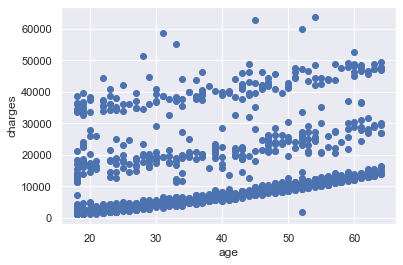

In [51]:
#checking the linear relationship between the dependent varaible and independent variable
x=df["age"]
y=df["charges"]
plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("charges")
plt.show()

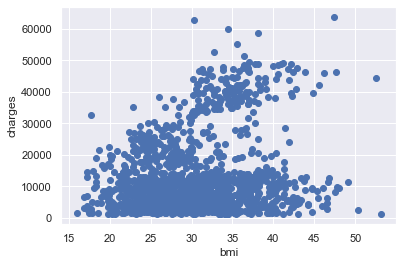

In [52]:
#checking the relationship between bmi and charges
x=df["bmi"]
y=df["charges"]
plt.scatter(x,y)
plt.xlabel("bmi")
plt.ylabel("charges")
plt.show()

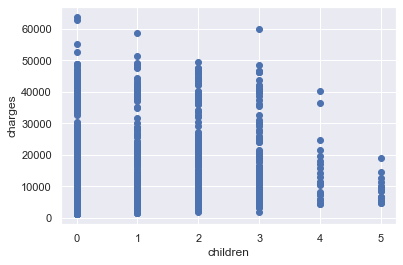

In [53]:
#checking the relationship between bmi and charges
x=df["children"]
y=df["charges"]
plt.scatter(x,y)
plt.xlabel("children")
plt.ylabel("charges")
plt.show()

In [54]:
#checking the relationships between the independent variables

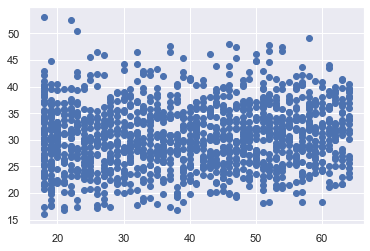

In [55]:
#checking the relatonship between the age and bmi columns
x=df["age"]
y=df["bmi"]
plt.scatter(x,y)
plt.show()

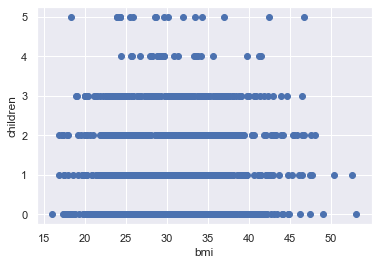

In [56]:
#relationship between the bmi and children columns
x=df["bmi"]
y=df["children"]
plt.xlabel("bmi")
plt.ylabel("children")
plt.scatter(x,y)
plt.show()

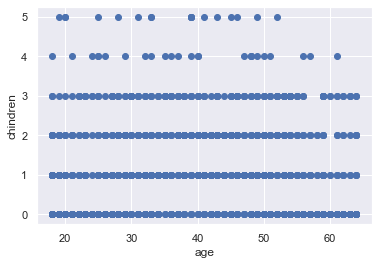

In [57]:
#relationship between the age and children columns
x=df["age"]
y=df["children"]
plt.xlabel("age")
plt.ylabel("chindren")
plt.scatter(x,y)
plt.show()

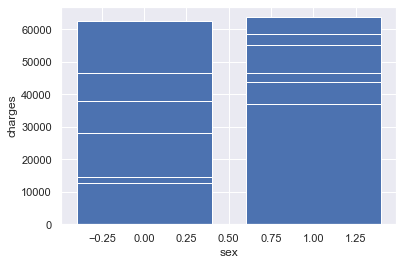

In [58]:
#barchart for the sex and charges
x=df["sex"]
y=df["charges"]
plt.xlabel("sex")
plt.ylabel("charges")
plt.bar(x,y)
plt.show()

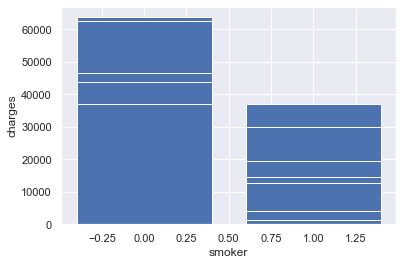

In [59]:
#barchart for the smoker and charges
x=df["smoker"]
y=df["charges"]
plt.xlabel("smoker")
plt.ylabel("charges")
plt.bar(x,y)
plt.show()

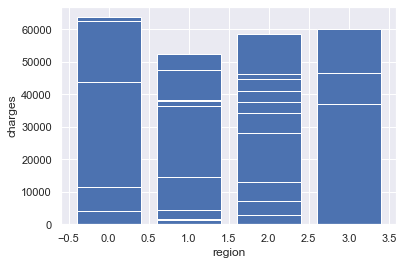

In [60]:
#barchart for the region and charges
x=df["region"]
y=df["charges"]
plt.xlabel("region")
plt.ylabel("charges")
plt.bar(x,y)
plt.show()

In [1]:
#splitting the features and target
X=df.drop(["Position","Salary",axis=1)
Y=df["Salary"]

SyntaxError: invalid syntax (1495456989.py, line 2)

In [62]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [63]:
print(Y)

0        2455.92400
1        3650.55230
2        4449.46200
3        3840.47061
4        3866.85520
           ...     
1333    12610.54830
1334     2895.98080
1335     4100.83350
1336     1402.94500
1337    36900.36030
Name: charges, Length: 1338, dtype: float64


# splitting the data into training and testing data

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [65]:
print(X_train.shape)

(1070, 6)


In [66]:
print(X_test.shape)

(268, 6)


In [67]:
print(X.shape)

(1338, 6)


In [68]:
X_train

,age,sex,bmi,children,smoker,region
882,21,1,22.135,0,1,2
505,37,0,30.875,3,1,3
798,58,1,33.100,0,1,1
792,22,1,23.180,0,1,2
201,48,1,32.230,1,1,0
...,...,...,...,...,...,...
466,60,1,28.700,1,1,1
299,48,1,28.880,1,1,3
493,61,0,43.400,0,1,1
527,51,1,25.800,1,1,1


In [69]:
X_test

,age,sex,bmi,children,smoker,region
17,23,0,23.845,0,1,2
1091,55,1,29.830,0,1,2
273,50,0,27.455,1,1,2
270,18,0,29.370,1,1,0
874,44,0,21.850,3,1,2
...,...,...,...,...,...,...
232,19,1,17.800,0,1,1
323,57,0,40.945,0,1,2
1337,61,1,29.070,0,0,3
1066,48,0,37.290,2,1,0


In [70]:
Y_train

882      2585.85065
505      6796.86325
798     11848.14100
792      2731.91220
201      8871.15170
           ...     
466     13224.69300
299      9249.49520
493     12574.04900
527      9861.02500
1192    13019.16105
Name: charges, Length: 1070, dtype: float64

In [71]:
Y_test

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    36900.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64

# MODEL TRAINING

In [72]:
#LINEAR REGRESSION MODEL
regressor=LinearRegression()

In [73]:
regressor.fit(X_train,Y_train)

LinearRegression()

# MODEL EVALUATION

In [74]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [75]:
#R squared value
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print("R squared value:",r2_train)

R squared value: 0.7537525683396303


In [76]:
training_data_prediction

array([  306.2283386 ,  9306.71658004, 13162.81141009, ...,
       17379.00271813,  9548.7500756 , 13730.2443782 ])

In [77]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [78]:
test_data_prediction

array([ 1405.01362234, 11514.07548469, 10070.41662993,  2166.50795173,
        7874.12783765, 11028.95665938,  3443.2619621 ,   525.23508163,
       12168.2825605 ,  9544.4479592 , 11593.89272142,  4785.98422518,
       29909.4684892 ,  -485.32434964, 12359.80826604, 13297.49626554,
        3722.75618929,  7795.79584938, 29431.26040526,  2203.49093913,
       12447.97002227,  2122.59476734, 34528.08881128, 31685.10734551,
       30303.95419793,  9008.30612496,  1766.36068339, 15321.2083728 ,
        6447.69472787,  1939.40707405,  9418.14775046,  5673.73934012,
        4329.94696557,  4937.70920273,  9632.73060897,  4480.71026279,
       29792.79913391,  6744.96179355, 27166.298361  , 14048.1567031 ,
         128.30778484, 28362.4053685 ,  7781.70291386,  1324.01024505,
       10229.3815021 ,  7938.21360062, 11628.87529861,  8152.61425491,
       10765.3316331 , 13820.53403311,  5725.27130923,  -863.91915941,
       26205.36134176, 37214.60360272,  7285.80522788, 17876.30350679,
      

In [79]:
#R squared value
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print("R squared value:",r2_test)

R squared value: 0.7481525625631971


In [80]:
#BUILDING THE PRESICTIVE SYSTEM(PREDICTION)

In [81]:
input_data=(52,1,30.78,1,1,2)
#cahnging the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)

print("the health insurance cost is:",prediction[0])

[11666.70668045]
the health insurance cost is: 11666.706680453555


In [82]:
import numpy as np
input_data=(23,0,23.845,0,1,2)
#changinf the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print("the helath insurance cost is:",prediction[0])

[1405.01362234]
the helath insurance cost is: 1405.0136223434401


In [83]:
#prediction from the user input
#taking the input from the user
age=input("enter the age:")
sex=input("enter the sex:")
bmi=input("enter the bmi:")
children=input("enter the no of children:")
smoker=input("enter the status of the smoker:")
region=input("enter the region:")
input_data=(age,sex,bmi,children,smoker,region)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=regressor.predict(input_data_reshaped)
print(prediction)
print("the health insurance cost is:",prediction[0])

enter the age:23
enter the sex:1
enter the bmi:23.45
enter the no of children:1
enter the status of the smoker:1
enter the region:0
[1443.88820019]
the health insurance cost is: 1443.8882001881684


In [84]:
input_data=(0,1,30.78,1,1,2)
a=list(input_data)
#print(a)
if(a[0]==0):
    print("INVALID INPUT")
else:
    #cahnging the input_data to numpy array
    input_data_as_numpy_array=np.asarray(input_data)
    #reshape the array
    input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
    prediction=regressor.predict(input_data_reshaped)
    print(prediction)
    print("the health insurance cost is:",prediction[0])

INVALID INPUT


In [85]:
#prediction from the user input
#taking the input from the user
age=input("enter the age:")
sex=input("enter the sex:")
bmi=input("enter the bmi:")
children=input("enter the no of children:")
smoker=input("enter the status of the smoker:")
region=input("enter the region:")
input_data=(age,sex,bmi,children,smoker,region)
a=list(input_data)
print(a)
if(a[0]=="0"or a[0]=="1"or a[0]=="2" or a[0]=="3" or a[0]=="4" or a[0]=="5" or a[0]=="6" or a[0]=="7" or a[0]=="8" or a[0]=="9" or a[0]=="10" or a[0]=="11" or a[0]=="12" or a[0]=="13" or a[0]=="14" or a[0]=="15" or a[0]=="16" or a[0]=="17" or a[0]=="18"):
    print("INVALID INPUT\n the charges are:0")
else:
    #cahnging the input_data to numpy array
    input_data_as_numpy_array=np.asarray(input_data)
    #reshape the array
    input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
    prediction=regressor.predict(input_data_reshaped)
    print(prediction)
    print("the health insurance cost is:",prediction[0])

enter the age:0
enter the sex:0
enter the bmi:0
enter the no of children:0
enter the status of the smoker:0
enter the region:0
['0', '0', '0', '0', '0', '0']
INVALID INPUT
 the charges are:0


In [89]:
df[["age","sex","children"]]

,age,sex,children
0,19,1,0
1,18,0,1
2,28,0,3
3,33,0,0
4,32,0,0
...,...,...,...
1333,50,0,3
1334,18,1,0
1335,18,1,0
1336,21,1,0
